# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I have chosen the TMDB Movie Dataset to analyze.  This Dataset includes data on approximately 10,000 movies.  Here is a list of the different columns listed in the dataset:
    
id - unique identifier for each movie/row                      

imdb_id - the ID established by IMDB (some null values in dataset)

popularity - popularity score for the film

budget - cost to produce the movie

revenue - the amount of money the movie has made

original_title - title of the movie

cast - list of cast members in the movie (some null values in dataset)

homepage - the website of the film (some null values in dataset)

director - Director of the film (some null values in dataset)

tagline - any taglines or "slogans" associates with the movie (some null values in dataset)

keywords - keyword or phrases associates with the movie (some null values in dataset)

overview - brief  synopsis of the movie (some null values in dataset)

runtime - length of the movie 

genres - type or category associated with the movie (some null values in dataset)

production_companies - companies listed that helped produce the movie (some null values in dataset)

release_date - the date the movie was released to the public

vote_count - number of people who voted for the movie

vote_average - the average score of the votes (appears to be based on a 1 - 10 scale)

release_year - year the movie was released 

budget_adj - cost of the movie based off 2010 inflation            

revenue_adj - amount of money the movie has made based off 2010 inflation 
              

### Question(s) for Analysis

What insights can we get from movies that "made money"?  "Made money", in this case, means movies where the revenue is higher than the budget.  I will be using the Adjusted Budget and Adjusted Revenue to determine if the movie "made money".

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.5MB/s ta 0:00:011  8% |██▉                             | 931kB 12.3MB/s eta 0:00:01    14% |████▌                           | 1.5MB 11.6MB/s eta 0:00:01    47% |███████████████▏                | 4.9MB 24.9MB/s eta 0:00:01    52% |████████████████▋               | 5.4MB 8.1MB/s eta 0:00:01    57% |██████████████████▎             | 6.0MB 11.8MB/s eta 0:00:01    62% |████████████████████            | 6.6MB 24.3MB/s eta 0:00:01    67% |█████████████████████▊          | 7.1MB 24.1MB/s eta 0:00:01    73% |███████████████████████▋        | 7.7MB 11.5MB/s eta 0:00:01    78% |█████████████████████████▎      | 8.2MB 16.3MB/s eta 0:00:01    84% |███████████████████████████     | 8.8MB 11.5MB/s eta 0:00:01    89% |████████████████████████████▌   | 9.3MB 24.1MB/s eta 0:00:01    94% |██████████████████████████████▏ | 9.9MB 7.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.3MB/s eta 0:00:01  6% |██                            

<a id='wrangling'></a>
## Data Wrangling

Over the next few lines I'll run various functions to load and explore my dataset.


In [47]:
df = pd.read_csv('tmdb-movies.csv')

In [48]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [50]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [51]:
df.shape

(10866, 21)

In [52]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [53]:
df.index

RangeIndex(start=0, stop=10866, step=1)

In [54]:
sum(df.duplicated())

1

In [55]:

### Data Cleaning

After exploring my dataset I've noticed a few things:
1.  I have a duplicate row that I want to remove from the dataset
2.  I want to drop some columns that won't provide any context to my questions.
3.  I want to insert some new columns: one to flag if the movie "made money", and one to group movies by decade.

SyntaxError: invalid syntax (<ipython-input-55-013a10e663eb>, line 4)


### Dealing with Duplicates
> In order to identify and remove unwanted duplicates, I'm going to use the SUM and DUPLICATED functions to identify any duplicate rows in the dataset.  I'll then drop the duplicates with the DROP_DUPLICATES function.  Finally, I'll run the SUM FUNCTION again to confirm no duplicates remain.

In [56]:
sum(df.duplicated())

1

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
sum(df.duplicated())

0


### Dropping Columns

Now I want to drop some columns that have null values or won't contribute to answering my questions around the dataset.

In [59]:
df.drop(['imdb_id','cast','homepage','director','tagline','keywords','overview','genres','production_companies'], axis=1, inplace=True)


### Adding Column To identify if movie made money
> I'm going to create a column that will determine if the movie made money against its adjusted budget.  This will make it easier to identify during my analysis.

In [60]:
df['made_money'] = np.where(df.revenue_adj >= df.budget_adj, True, False)


### Adding Column To identify Decade
> I want to group the movies by the decade they were released to do some analysis on revenue trends by decade.

For this code, I referenced the following blog to help understand how to group the years into decades:

Author(s): Charlie Cluster

Date 7/1/2020

Type: Example Code

Web address or publisher: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

In [61]:
conditions = [
    (df['release_year'] >= 1960) & (df['release_year'] <= 1969),
    (df['release_year'] >= 1970) & (df['release_year'] <= 1979),
    (df['release_year'] >= 1980) & (df['release_year'] <= 1989),
    (df['release_year'] >= 1990) & (df['release_year'] <= 1999),
    (df['release_year'] >= 2000) & (df['release_year'] <= 2009),
    (df['release_year'] >= 2010) & (df['release_year'] <= 2015),
    ]

values = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

df['decade'] = np.select(conditions, values)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
made_money        10865 non-null bool
decade            10865 non-null object
dtypes: bool(1), float64(4), int64(6), object(3)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Question What insights can we get from movies that "made money"?

I'm going to create two masks - one to hold movie data for movies that earned more than their budget (made_money), and another mask for movies that earned less than their budget (lost_money)

In [63]:
made_money = df.made_money == True
lost_money = df.made_money == False

Let's look at the avaerage run time of these two groups.

In [64]:
df.runtime[made_money].mean()

101.67067704647323

In [65]:
df.runtime[lost_money].mean()

103.49643904482615

On average, it appears that movies that made money have a shorter runtime than movies that lost money.  Let's see if we can gain any insights from looking at this data in a historgram.

To understand how to set Axis labels, I referenced the following blog's code:
Author(s): Jonathan Soma

Date: Unknown - 2016 at the earliest

Type: Example Code

Web address or publisher: https://jonathansoma.com/lede/data-studio/matplotlib/labeling-your-axes-in-pandas-and-matplotlib/

In [72]:
def chart(x_axis):
    ax = df[x_axis][made_money].hist(alpha=0.5, bins=30, label='Made Money',figsize=(10,10))
    ax = df[x_axis][lost_money].hist(alpha=0.5, bins=30, label='Lost Money',figsize=(10,10))
    ax.set_xlabel(x_axis)
    ax.set_ylabel("Number of Movies");
    plt.legend();

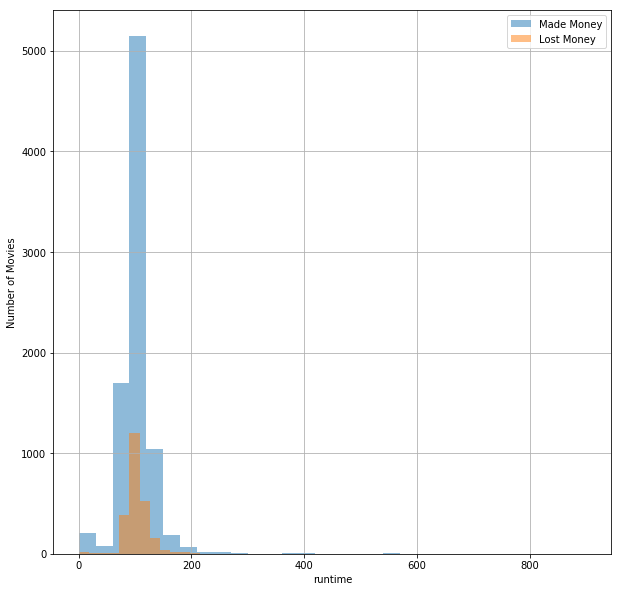

In [73]:
chart("runtime")

With movies generally staying within standard runtime frame, we don't get a lot of insight from looking at runtime as it relates to making money.  However we can see that most movies in our dataset made their money back.

Let's look at the the movies and whether they made money or not over the years.

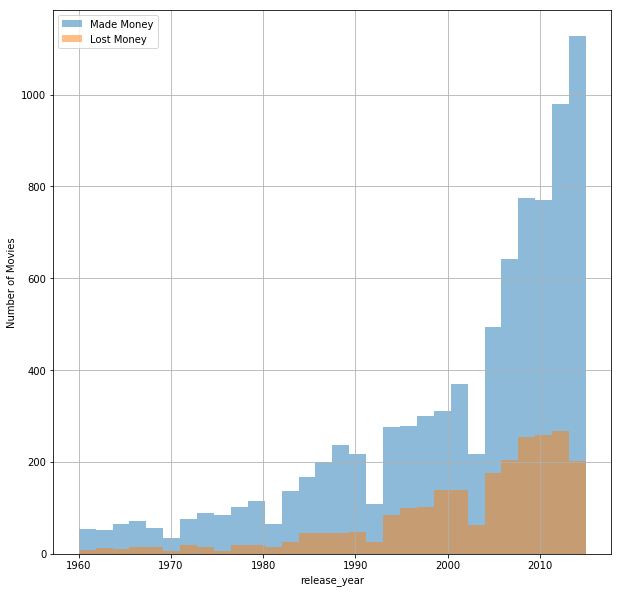

In [74]:
chart("release_year")

As we progress through the years in our dataset we can see that the total number of movies increase with each year.  We can also see that the number of movies that made money is always larger than the movies that lost money (at least for the movies listed in the dataset).

Let's compare the masks by decade.

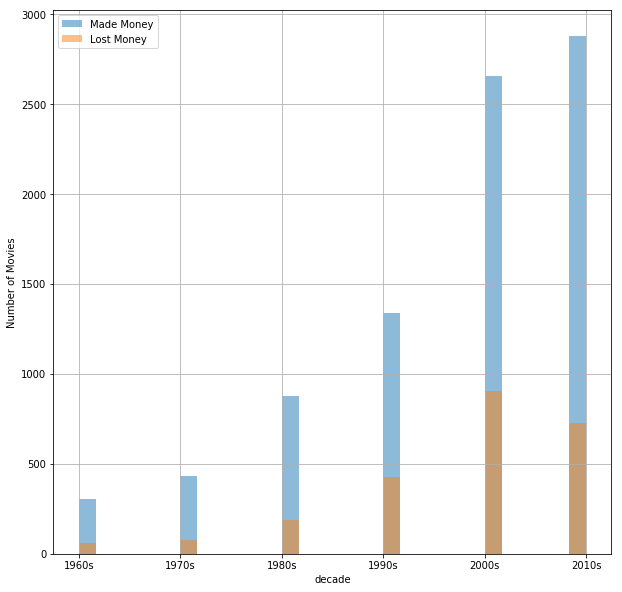

In [75]:
chart("decade")

From this chart its clear that the movies that make money far out number the movies that lose money.  At first glance, it's interesting that the number of movies that lost money has its highest count in the 2000s, but we only have movies up until 2015 in the 2010s group, so that may be misleading.

Let's take a look a the percentage of movies that made money, grouped by the decade.

To understand how to move the Y-Axis, I referenced the following blog's code:
Author(s): Kumar Rishi

Date 6/15/2021

Type: Example Code

Web address or publisher: https://www.tutorialspoint.com/how-to-change-the-range-of-the-x-axis-and-y-axis-in-matplotlib

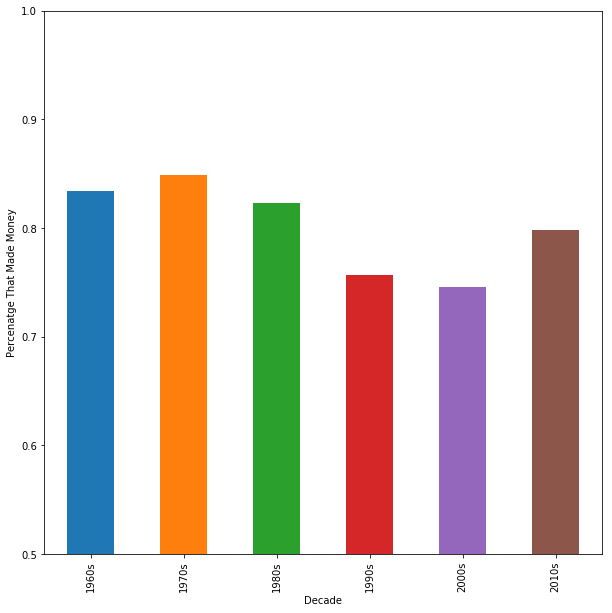

In [76]:
ax = df.groupby('decade').made_money.mean().plot(kind='bar',figsize=(10,10)) 
ax.set_ylim(.5, 1);
ax.set_xlabel("Decade")
ax.set_ylabel("Percenatge That Made Money");

When we look at the percentage of movies that made money, grouped by decades, we can see that percentage peak in the 1970s.  We then see a 3 decade downward trend in the 1980s, 1990s, and 2000s.  The percentage starts to climb up again in the 2010s, and that's only with data up until 2015.

<a id='conclusions'></a>
## Conclusions

> In reagrd to the data available in this dataset, we can come to a few conclusions:
    1. There were more movies where the revenue was equal to or higher than the budget, which I catorgized as "Made Money".
    2. On average, the runtimes for movies that "made money" were shorter than movies that "lost money".
    3. The percentage of movies that "made money" peaked in the 1970s, before declining over the next few 
    decades.
    
    

### Limitation
> A movie's budget doesn't always include additional costs, like marketing.  Although this dataset shows movies where the revenue is higher than the budget, that doesn't always mean it "made money".  It would be helpful to know the full production cost of a movie to truly know if if made money.

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0